In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("HousingData.csv")

In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [8]:
outliers = find_outliers_IQR(df["MEDV"])
print("number of outliers: "+ str(len(outliers)))

number of outliers: 26


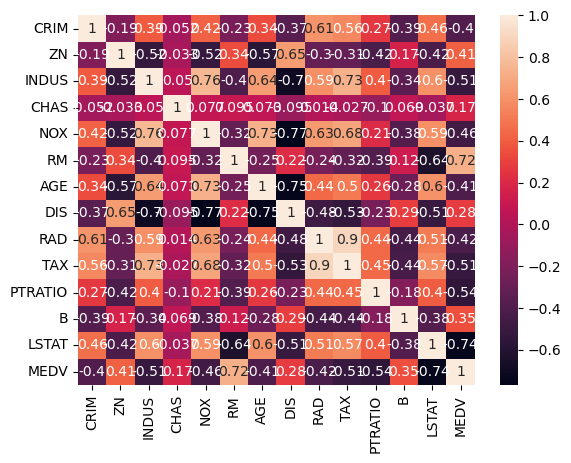

In [13]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [14]:
# Split the data into features and target variable
X = df.drop('MEDV', axis=1)
y =df['MEDV']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred_linear = linear_reg_model.predict(X_test)

In [18]:
linear_r2 = r2_score(y_test, y_pred_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [19]:
print("Linear Regression Model:")
print("R-squared (R2):", linear_r2)
print("Root Mean Squared Error (RMSE):", linear_rmse)

Linear Regression Model:
R-squared (R2): 0.6270849941673194
Root Mean Squared Error (RMSE): 5.608390826694484
